# 16S rRNA Data preprocessing for Convolutional Neural Network(CNN)
This jupyter notebook goes through every step on how the curated data is preprocessed for CNN input data.
The preprocessing flow can be shown as below.


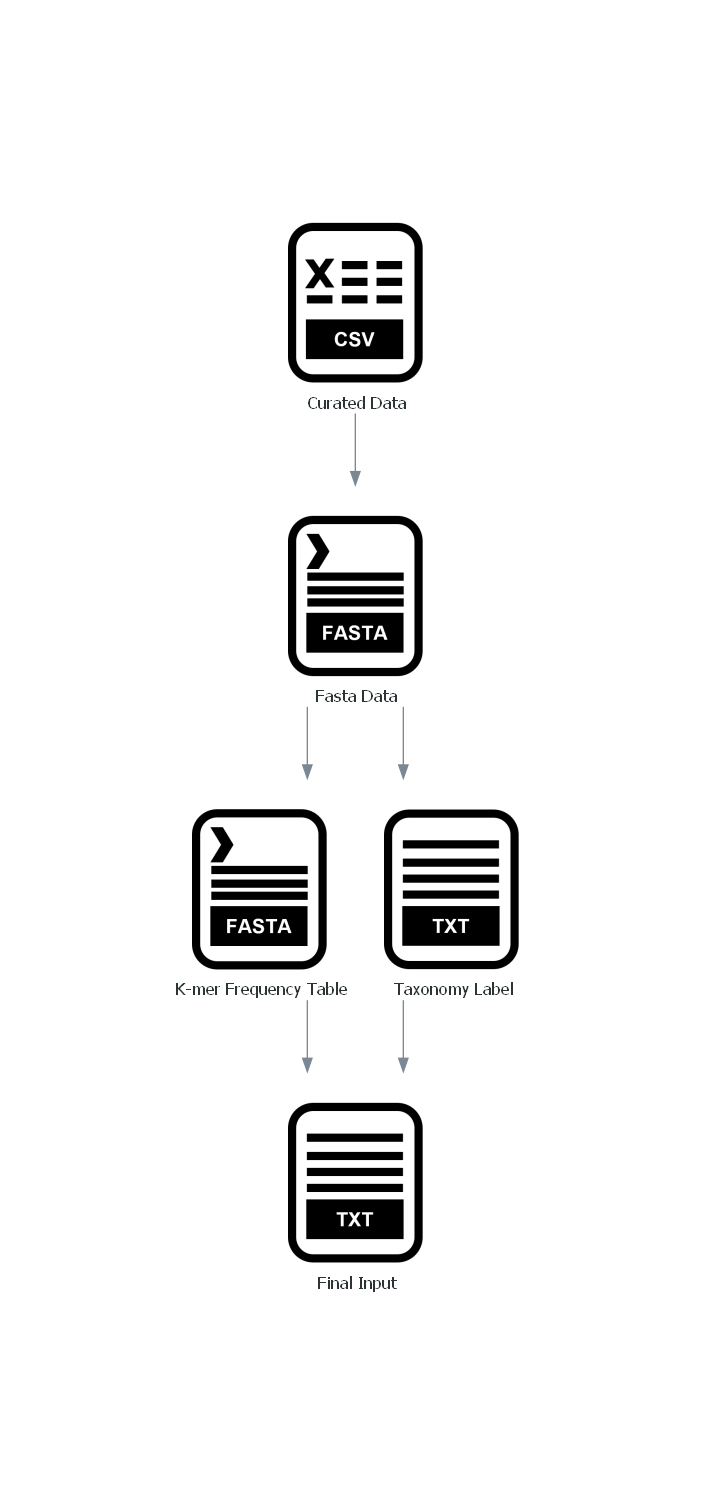

In [1]:
from diagrams import Diagram, Cluster
from diagrams.custom import Custom
from urllib.request import urlretrieve


with Diagram(show=False,direction="TB") as diagram:
    csv_url = "https://user-images.githubusercontent.com/86283637/167264273-f39ed4eb-9e58-4b80-922b-76652db00d85.png"
    csv_icon = "csv.png"
    urlretrieve(csv_url,csv_icon)

    fasta_url = "https://user-images.githubusercontent.com/86283637/167264518-c3eb8d60-dbef-4016-b3a2-bace85f98ab4.png"
    fasta_icon = "fasta.png"
    urlretrieve(fasta_url,fasta_icon)

    txt_url = "https://user-images.githubusercontent.com/86283637/167264270-861a9a7a-3935-41a9-8071-2aab77cf1cd6.png"
    txt_icon = "txt.png"
    urlretrieve(txt_url,txt_icon)

    curated_data = Custom("\n Curated Data", csv_icon)
    fasta_format = Custom("\n Fasta Data", fasta_icon)
    x = Custom("\n K-mer Frequency Table", fasta_icon)
    y = Custom("\n Taxonomy Label", txt_icon)
    final_input = Custom("\n Final Input", txt_icon)

    curated_data >> fasta_format >> [x,y] >> final_input


diagram

### 1. Converting the curated data into fasta format
reason: easily handle database with the Biopython library

In [32]:
import csv
import pandas as pd


filename = "mini_data"
mini_data = 'mini_data.csv'
rows = []

# 1.1 read csv file
with open(mini_data, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)            # skip header
    for row in csvreader:
            rows.append(row)

# visualize with Pandas
taxon_column = ['ID', 'Kingdom','Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'seq']
csv_read = pd.DataFrame(data=rows, columns=taxon_column)
csv_read

,ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,seq
0,seq_id35012,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Chromatiaceae,g_Chromatiaceae,g_Chromatiaceae sp,ATTGAACGCTGGCGGCATGCCTAACACATGCAAGTCGAACGCGAAA...
1,seq_id43352,Bacteria,Tenericutes,Mollicutes,Acholeplasmatales,Acholeplasmataceae,Acholeplasma,Acholeplasma sp,GATGAACGCTGGCGGCGCGCCTAATACATGCAAGTCGAACGGACTA...
2,seq_id17093,Bacteria,Firmicutes,Clostridia,Eubacteriales,Clostridiaceae,Clostridium,Clostridium sp,GACGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGATGAA...
3,seq_id11595,Bacteria,Firmicutes,Bacilli,Caryophanales,Bacillaceae,Bacillus,Bacillus sp,GACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGAACCT...
4,seq_id02880,Bacteria,Actinobacteria,Actinobacteria,Streptomycetales,Streptomycetaceae,Kitasatospora,Kitasatospora setae,ACATTCACGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGC...
5,seq_id10298,Bacteria,Cyanobacteria,Cyanophyceae,Nostocales,Calotrichaceae,Calothrix,Calothrix sp,AAAACGGAGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGTATG...
6,seq_id06508,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prolixibacteraceae,Draconibacterium,Draconibacterium sp,GATGAACGCTAGCGGGAGGCTTAACACATGCAAGTCGAGGGGCAGC...
7,seq_id19341,Bacteria,Firmicutes,Clostridia,Eubacteriales,Lachnospiraceae,Catonella,Catonella sp,GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAACGGAGAT...
8,seq_id39835,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Acinetobacter sp,ATTGAACGCTGGCGGCAGGCTTAACACATGCAAGTCGAGCGGAGAG...
9,seq_id36148,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,AAATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGG...


In [36]:
# 1.2 split records into taxa (Order~Genus) and sequences
IDtaxon = []        # list contains seqID + taxon
seqList= []         # list only contains sequences

for row in rows:
    temp = []
    temp.append(row[0])  # seq_id
    temp.extend(row[4:7])  # taxon from order to genus
    IDtaxon.append(temp)

    seq = row[-1] + '\n'
    seqList.append(seq)

header = ['seqID','Order','Family','Genus']
taxon_read = pd.DataFrame(data=IDtaxon, columns=header)

taxon_read

,seqID,Order,Family,Genus
0,seq_id35012,Chromatiales,Chromatiaceae,g_Chromatiaceae
1,seq_id43352,Acholeplasmatales,Acholeplasmataceae,Acholeplasma
2,seq_id17093,Eubacteriales,Clostridiaceae,Clostridium
3,seq_id11595,Caryophanales,Bacillaceae,Bacillus
4,seq_id02880,Streptomycetales,Streptomycetaceae,Kitasatospora
5,seq_id10298,Nostocales,Calotrichaceae,Calothrix
6,seq_id06508,Bacteroidales,Prolixibacteraceae,Draconibacterium
7,seq_id19341,Eubacteriales,Lachnospiraceae,Catonella
8,seq_id39835,Pseudomonadales,Moraxellaceae,Acinetobacter
9,seq_id36148,Enterobacterales,Enterobacteriaceae,Escherichia


In [37]:
print(seqList)

['ATTGAACGCTGGCGGCATGCCTAACACATGCAAGTCGAACGCGAAAACCCCTTTGGGGGCGAGTAGAGTGGCGAACGGGTGAGTAACGCGTGGGAATCTGCCTCATAGTGGGGGACAACCCGGGGAAACTCGGGCTAATACCGCATACGTCCTATGGGAGAAAGGGAGCCTCTGTTTATAAGCTCTCGCTATGAGATGAGCCCGCGTCCGATTAGCTTGTTGGTAGAGTAAAAGCCTACCAAGGCGATGATCGGTAGCTGGTCTGAGAGGATGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTGCGGGTTGTAAAGCACTTTCAGTTGGGAAGAAACGCTTTGGGTTAATACCCCAAGGTTTTGACGTTACCAACAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGTCAGACAAGTCAGATGTGAAAGCCCCGGGCTCAACCTGGGAATTGCATTTGATACTGTTCGACTAGAGTATGGTAGAGGGGGGTGGAATTCCAGGTGTAGCGGTGAAATGCGTAGATATCTGGAGGAACACCAGTGGCGAAGGCGACCCCCTGGACCAATACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTAGCCGTTGGGCTCATTTGAGAGTTTAGTGGCGCAGCTAACACGATAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCAGCCCTTGACATCCTACGAACTATCTAGGGATAGATAGGTGCCT

In [38]:
# 1.3 create new records with fasta format
new_record = ''
for i in range(len(IDtaxon)):
    # replace taxon containing space with '_'   ex) E.col -> E_coli
    converter = lambda x: x.replace(' ', '_')
    new_taxon =  list(map(converter, IDtaxon[i]))

    # format: >seqID taxon
    #         sequences
    new_record += '>' + (' '.join(new_taxon)) + '\n' + (''.join(seqList[i]))


print(new_record)

>seq_id35012 Chromatiales Chromatiaceae g_Chromatiaceae
ATTGAACGCTGGCGGCATGCCTAACACATGCAAGTCGAACGCGAAAACCCCTTTGGGGGCGAGTAGAGTGGCGAACGGGTGAGTAACGCGTGGGAATCTGCCTCATAGTGGGGGACAACCCGGGGAAACTCGGGCTAATACCGCATACGTCCTATGGGAGAAAGGGAGCCTCTGTTTATAAGCTCTCGCTATGAGATGAGCCCGCGTCCGATTAGCTTGTTGGTAGAGTAAAAGCCTACCAAGGCGATGATCGGTAGCTGGTCTGAGAGGATGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTGCGGGTTGTAAAGCACTTTCAGTTGGGAAGAAACGCTTTGGGTTAATACCCCAAGGTTTTGACGTTACCAACAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGTCAGACAAGTCAGATGTGAAAGCCCCGGGCTCAACCTGGGAATTGCATTTGATACTGTTCGACTAGAGTATGGTAGAGGGGGGTGGAATTCCAGGTGTAGCGGTGAAATGCGTAGATATCTGGAGGAACACCAGTGGCGAAGGCGACCCCCTGGACCAATACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTAGCCGTTGGGCTCATTTGAGAGTTTAGTGGCGCAGCTAACACGATAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAA

In [ ]:
# 1.4 write records into the fasta file
with open(filename.split('.')[0] + '.fasta', "w") as f:  # rewrite file content
    f.write(new_record)
    f.close()

### 2. Converting sequence and taxon into k-mer frequency matrix and label, respectively


#### 2.1. k-mer frequency matrix



In [26]:
from itertools import product
from Bio import SeqIO
from collections import Counter


k = 4   # ex) 4-mer
ALPHABET = "ACGT"
kmers = [''.join(chars) for chars in product(*(k*(ALPHABET,)))]
print(kmers)

['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT', 'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT', 'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCG', 'ACCT', 'ACGA', 'ACGC', 'ACGG', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT', 'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT', 'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT', 'ATAA', 'ATAC', 'ATAG', 'ATAT', 'ATCA', 'ATCC', 'ATCG', 'ATCT', 'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT', 'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACA', 'CACC', 'CACG', 'CACT', 'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT', 'CCAA', 'CCAC', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT', 'CCGA', 'CCGC', 'CCGG', 'CCGT', 'CCTA', 'CCTC', 'CCTG', 'CCTT', 'CGAA', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT', 'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTA', 'CGTC', 'CGTG', 'CGTT', 'CTAA', 'CTAC', 'CTAG', 'CTAT', 'CTCA', 'CTCC', 'CTCG', 'CTCT', 'CTGA', 'CTGC', 'CTGG', 'CTGT', 'CTTA',

In [47]:
matrice = []
fastafile = 'mini_data.fasta'
for record in SeqIO.parse(fastafile, "fasta"):
    seq = str(record.seq)

    # 2.1.1 split sequences into kmer size
    kmer_content = []
    for i in range(0, len(seq) -k+1):
        kmer_content.append(seq[i:i+k])

    # 2.1.2 count how many kmers from kmers_list in the kmer-sized split sequences (=kmer frequency matrix)
    counts = Counter(kmer_content)

    kmer_dict = {}
    for kmer in kmers:
        kmer_dict[kmer] = counts[kmer]

    # 2.1.3 align seqID with the kmer frequency matrices
    temp = []
    temp.append(record.id)
    temp.append(kmer_dict)
    matrice.append(temp)

print(matrice)

[['seq_id35012', {'AAAA': 4, 'AAAC': 9, 'AAAG': 7, 'AAAT': 1, 'AACA': 5, 'AACC': 8, 'AACG': 10, 'AACT': 6, 'AAGA': 4, 'AAGC': 10, 'AAGG': 9, 'AAGT': 7, 'AATA': 6, 'AATC': 5, 'AATG': 6, 'AATT': 5, 'ACAA': 5, 'ACAC': 10, 'ACAG': 4, 'ACAT': 2, 'ACCA': 8, 'ACCC': 6, 'ACCG': 6, 'ACCT': 3, 'ACGA': 4, 'ACGC': 7, 'ACGG': 7, 'ACGT': 7, 'ACTA': 3, 'ACTC': 6, 'ACTG': 8, 'ACTT': 1, 'AGAA': 9, 'AGAC': 4, 'AGAG': 8, 'AGAT': 7, 'AGCA': 7, 'AGCC': 9, 'AGCG': 9, 'AGCT': 7, 'AGGA': 6, 'AGGC': 5, 'AGGG': 5, 'AGGT': 8, 'AGTA': 7, 'AGTC': 9, 'AGTG': 6, 'AGTT': 4, 'ATAA': 3, 'ATAC': 8, 'ATAG': 3, 'ATAT': 2, 'ATCA': 4, 'ATCC': 3, 'ATCG': 4, 'ATCT': 3, 'ATGA': 7, 'ATGC': 6, 'ATGG': 8, 'ATGT': 4, 'ATTA': 3, 'ATTC': 2, 'ATTG': 5, 'ATTT': 2, 'CAAA': 2, 'CAAC': 6, 'CAAG': 8, 'CAAT': 5, 'CACA': 6, 'CACC': 5, 'CACG': 5, 'CACT': 2, 'CAGA': 9, 'CAGC': 9, 'CAGG': 3, 'CAGT': 4, 'CATA': 2, 'CATC': 2, 'CATG': 7, 'CATT': 2, 'CCAA': 4, 'CCAC': 3, 'CCAG': 9, 'CCAT': 1, 'CCCA': 3, 'CCCC': 5, 'CCCG': 7, 'CCCT': 6, 'CCGA': 1, 

In [49]:
# 2.1.4 rewrite file content

## first row contains header and all cases of kmer
first_row = 'seq_id' + ','
for kmer in kmers:
    first_row += kmer + ','

first_row = first_row[:-1] +'\n'


print(first_row)

seq_id,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,AAGG,AAGT,AATA,AATC,AATG,AATT,ACAA,ACAC,ACAG,ACAT,ACCA,ACCC,ACCG,ACCT,ACGA,ACGC,ACGG,ACGT,ACTA,ACTC,ACTG,ACTT,AGAA,AGAC,AGAG,AGAT,AGCA,AGCC,AGCG,AGCT,AGGA,AGGC,AGGG,AGGT,AGTA,AGTC,AGTG,AGTT,ATAA,ATAC,ATAG,ATAT,ATCA,ATCC,ATCG,ATCT,ATGA,ATGC,ATGG,ATGT,ATTA,ATTC,ATTG,ATTT,CAAA,CAAC,CAAG,CAAT,CACA,CACC,CACG,CACT,CAGA,CAGC,CAGG,CAGT,CATA,CATC,CATG,CATT,CCAA,CCAC,CCAG,CCAT,CCCA,CCCC,CCCG,CCCT,CCGA,CCGC,CCGG,CCGT,CCTA,CCTC,CCTG,CCTT,CGAA,CGAC,CGAG,CGAT,CGCA,CGCC,CGCG,CGCT,CGGA,CGGC,CGGG,CGGT,CGTA,CGTC,CGTG,CGTT,CTAA,CTAC,CTAG,CTAT,CTCA,CTCC,CTCG,CTCT,CTGA,CTGC,CTGG,CTGT,CTTA,CTTC,CTTG,CTTT,GAAA,GAAC,GAAG,GAAT,GACA,GACC,GACG,GACT,GAGA,GAGC,GAGG,GAGT,GATA,GATC,GATG,GATT,GCAA,GCAC,GCAG,GCAT,GCCA,GCCC,GCCG,GCCT,GCGA,GCGC,GCGG,GCGT,GCTA,GCTC,GCTG,GCTT,GGAA,GGAC,GGAG,GGAT,GGCA,GGCC,GGCG,GGCT,GGGA,GGGC,GGGG,GGGT,GGTA,GGTC,GGTG,GGTT,GTAA,GTAC,GTAG,GTAT,GTCA,GTCC,GTCG,GTCT,GTGA,GTGC,GTGG,GTGT,GTTA,GTTC,GTTG,GTTT,TAAA,TAAC,TAAG,TAAT,TACA,TACC,TAC

In [51]:
## remains contain kmer frequency matrices in accordance with seqID
rows = ''
for matrix in matrice:
    row = matrix[0] + ','
    for kmer in matrix[1]:
        row += str(matrix[1][kmer]) + ','
    row = row[:-1] + '\n'
    rows += row


print(rows)

seq_id35012,4,9,7,1,5,8,10,6,4,10,9,7,6,5,6,5,5,10,4,2,8,6,6,3,4,7,7,7,3,6,8,1,9,4,8,7,7,9,9,7,6,5,5,8,7,9,6,4,3,8,3,2,4,3,4,3,7,6,8,4,3,2,5,2,2,6,8,5,6,5,5,2,9,9,3,4,2,2,7,2,4,3,9,1,3,5,7,6,1,8,10,5,5,2,6,9,8,5,3,5,7,3,8,6,5,6,11,11,7,5,8,4,6,5,4,3,4,2,4,3,6,6,11,3,5,2,4,3,9,8,11,9,6,3,4,7,8,8,8,8,7,5,8,3,8,4,6,6,3,7,8,9,10,6,9,8,8,4,7,4,13,4,13,5,3,8,10,7,18,10,15,8,7,3,14,9,8,3,12,1,6,6,7,2,9,6,12,5,5,3,9,4,6,6,4,7,4,7,6,3,7,5,4,7,1,2,4,1,4,1,6,4,3,3,3,4,6,3,7,4,2,1,5,0,7,7,8,6,7,7,6,3,6,7,20,6,3,4,5,4,6,4,4,2,1,2,5,0,6,5,8,4,3,1,5,1
seq_id43352,10,13,10,4,6,5,9,12,8,11,10,13,8,6,8,5,5,5,5,4,7,5,2,4,5,6,8,5,5,8,8,3,6,2,9,6,9,5,9,4,8,7,7,9,11,5,8,9,7,10,2,6,6,1,3,1,8,5,5,7,6,2,4,4,8,4,9,4,4,3,6,0,4,5,4,7,3,2,6,4,4,4,5,2,2,3,5,3,2,6,5,3,4,0,3,6,10,2,5,1,6,5,5,4,6,7,4,8,6,4,6,2,7,3,8,1,5,2,3,4,10,4,9,0,4,2,5,3,10,6,11,11,2,4,5,7,6,7,13,5,9,1,7,4,11,3,6,3,4,4,7,5,8,5,7,7,7,4,6,2,12,5,8,8,4,7,7,7,12,3,8,7,9,3,10,6,13,6,7,2,4,2,4,5,9,6,9,3,7,4,9,3,9,9,12,8,7,6,4,5,5,4,4,8,5,2,4,3,5,1,4,6,

In [ ]:
## merge into one fasta file
with open(fastafile.split('.')[0] + '_matrix.fasta', "w") as f:
    f.write(first_row)
    f.write(rows)
    f.close()

### 2.2 Taxon labels



In [52]:
# 2.2.1 read only seqID and taxa in the fasta file
with open(fastafile, 'r') as f:
    lines = f.readlines()
    f.close()

contents = ''
for line in lines:
    if line[0] == '>':
        contents += line

print(contents)

>seq_id35012 Chromatiales Chromatiaceae g_Chromatiaceae
>seq_id43352 Acholeplasmatales Acholeplasmataceae Acholeplasma
>seq_id17093 Eubacteriales Clostridiaceae Clostridium
>seq_id11595 Caryophanales Bacillaceae Bacillus
>seq_id02880 Streptomycetales Streptomycetaceae Kitasatospora
>seq_id10298 Nostocales Calotrichaceae Calothrix
>seq_id06508 Bacteroidales Prolixibacteraceae Draconibacterium
>seq_id19341 Eubacteriales Lachnospiraceae Catonella
>seq_id39835 Pseudomonadales Moraxellaceae Acinetobacter
>seq_id36148 Enterobacterales Enterobacteriaceae Escherichia



In [ ]:
# 2.2.2 create a new text file containing taxa (=labels)
with open(fastafile.split('.')[0] + '_taxonomy.txt', 'w') as f:
    f.write(contents)
    f.close()

### 3. Merge sequence data (kmer frequency matrix) and labels into one CNN inputdata



In [59]:
matrixfile = "mini_data_matrix.fasta"
taxonfile = "mini_data_taxonomy.txt"

filename = matrixfile.split('.')[0][:-6]
taxonlevels = ['Order', 'Family', 'Genus']

# create 3 separate input files for each order, family, genus level
for taxonlevel in taxonlevels:
    outputFile = open(filename + "input_{}.txt".format(taxonlevel[0]), 'w')
    matrix = list(open(matrixfile, 'r'))
    records = open(taxonfile, 'r')

    # write all kinds of kmer at the front as the previous kmer-matrix file
    outputFile.write(matrix[0])
    matrix = matrix[1:]

    i = 0
    for seq in records:
        elements = seq.split(" ")
        seqID_tax = elements[0][1:]
        taxon_index = taxonlevels.index(taxonlevel)
        taxon = elements[taxon_index+1]
        seqID_mat = matrix[i].split(",")[0]

    ## verify whether seqIDs from kmer-matrix file and taxon file are identical
        if seqID_mat == seqID_tax:
            outputFile.write(matrix[i].split('\n')[0] + ',' + taxon + '\n')
            i += 1
    outputFile.close()



### example
output = open('mini_data_input_F.txt', 'r')
lines = output.readlines()

mini_matrices, seqID, label = [],[],[]
for line in lines[1:]:
    data = line.split(',')

    seqID.append(data[0])
    matrix = []
    matrix.append(data[1])
    matrix.append(data[2])
    matrix.append(data[3])
    matrix.append('...')
    matrix.append(data[-3])
    matrix.append(data[-2])
    mini_matrices.append(matrix)
    label.append(data[-1].rstrip('\n'))

inputdata = []
for i in range(len(lines)-1):
    temp = []
    temp.append(seqID[i])
    temp.append(mini_matrices[i])
    temp.append(label[i])
    inputdata.append(temp)

header = ['seqID','kmer_frequency_matrices','label']
result = pd.DataFrame(data=inputdata, columns=header)


print(result)

         seqID  kmer_frequency_matrices               label
0  seq_id35012     [4, 9, 7, ..., 5, 1]       Chromatiaceae
1  seq_id43352  [10, 13, 10, ..., 2, 2]  Acholeplasmataceae
2  seq_id17093     [2, 7, 8, ..., 2, 0]      Clostridiaceae
3  seq_id11595     [4, 7, 9, ..., 5, 7]         Bacillaceae
4  seq_id02880     [3, 5, 9, ..., 1, 0]   Streptomycetaceae
5  seq_id10298     [6, 8, 9, ..., 1, 4]      Calotrichaceae
6  seq_id06508    [2, 10, 7, ..., 4, 4]  Prolixibacteraceae
7  seq_id19341    [4, 8, 10, ..., 0, 0]     Lachnospiraceae
8  seq_id39835     [3, 4, 9, ..., 3, 1]       Moraxellaceae
9  seq_id36148     [2, 6, 9, ..., 6, 1]  Enterobacteriaceae
